In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
url = "https://www.invent.org/NIHF-hall-of-fame-inductees-list-alphabetical"
response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text, "html.parser")

In [4]:
sections = soup.select('#section-4886, #section-4887, #section-4888, #section-4889, #section-4890, #section-4891, #section-4892, #section-4893, #section-4894, #section-4895, #section-4896, #section-4905, #section-4906, #section-4907, #section-4908, #section-4909, #section-4911, #section-4912, #section-4913, #section-4914, #section-4915, #section-4916, #section-4917, #section-4918, #section-4919, #section-4920')

In [5]:
hof = pd.DataFrame(columns=['name', 'invention'])
for section in sections:
    entries = section.find_all('li')
    for entry in entries:
        if entry.text.strip() != "":
            name, invention = entry.text.strip().replace(u'\xa0',' ').split(', ', 1)
            hof = pd.concat([hof, pd.DataFrame({'name': [name], 'invention': [invention]})])

In [6]:
hof.reset_index(drop=True, inplace=True)

In [7]:
hof[hof['invention'].str.contains(', ')]

,name,invention
38,Frederick Banting,"Isolated, Purified Insulin"
55,Charles Best,"Isolated, Purified Insulin"
71,Sylvia Blankenship,"1-MCP for Fruit, Vegetable and Flower Freshness"
79,Gail Borden,"Jr., Process for Condensing Milk"
131,James Collip,"Isolated, Purified Insulin"
241,Leopold Godowsky,"Jr., Kodachrome® Film"
246,Robert W. Gore,"ePTFE, Known by the GORE-TEX® Brand Name"
263,John Hays Hammond,"Jr., Radio Control"
278,Andrew Higgins,"LCVP (Landing Craft, Vehicle, Personnel); Higg..."
290,Birdsill Holly,"Jr., Modern-Day Fire Hydrant"


In [8]:
for i in range(len(hof)):
    if 'Jr., ' in hof.loc[i, 'invention']:
        hof.loc[i, 'name'] += ', Jr.'
        hof.loc[i, 'invention'] = hof.loc[i, 'invention'].replace('Jr., ', '')

In [9]:
inductee_links = []
for section in sections:
    links = section.find_all('a', href=True)
    for link in links:
        inductee_links.append(link['href'])

In [12]:
url_names = []
for link in inductee_links:
    name = link.split('/')[-1]
    url_names.append(name)
url_names = list(set(url_names))

In [14]:
#delete entries starting with '#section'
url_names = [x for x in url_names if not x.startswith('#section')]

In [15]:
url_names

['george-r-carruthers',
 'frederick-mckinley-jones',
 'david-walt',
 'norbert-rillieux',
 'grote-reber',
 'william-stanley',
 'rodney-d-bagley',
 'wallace-hume-carothers',
 'joseph-m-jacobson',
 'frank-j-zamboni',
 'albert-b-dick',
 'john-hays-hammond',
 'amos-joel',
 'georges-claude',
 'charles-p-ginsburg',
 'andrew-higgins',
 'carl-benz',
 'charles-best',
 'george-washington-carver',
 'george-washington-murray',
 'harriet-w-r-strong',
 'willem-j-kolff',
 'ernest-h-volwiler',
 'robert-adler',
 'otto-wichterle',
 'robert-moog',
 'marshall-jones',
 'alice-stoll',
 'benjamin-holt',
 'howard-head',
 'eugene-houdry',
 'william-edward-hanford',
 'paul-kollsman',
 'alfred-h-free',
 'john-t-parsons',
 'james-murray-spangler',
 'elisha-graves-otis',
 'dov-frohman-bentchkowsky',
 'vladimir-zworykin',
 'mary-dell-chilton',
 'games-slayter',
 'jean-hoerni',
 'alfred-y-cho',
 'kenneth-c-jordan',
 'martin-john-m-atalla',
 'arthur-l-fry',
 'donald-watts-davies',
 'samuel-alderson',
 'erastus-b-bigel

In [17]:
import jellyfish

In [18]:
def match_names(name):
    name_lower = name.lower()
    similarities = [jellyfish.jaro_winkler_similarity(name_lower, url_name) for url_name in url_names]
    max_index = similarities.index(max(similarities))
    return url_names[max_index]

In [19]:
hof['url_name'] = hof['name'].apply(match_names)

In [30]:
hof.to_csv('hof.csv', index=False)

In [31]:
hof

,name,invention,url_name
0,James Abercrombie,Blowout Preventer (BOP),james-abercrombie
1,Edward Goodrich Acheson,Carborundum,edward-goodrich-acheson
2,Stewart Adams,Ibuprofen,stewart-adams
3,Leonard Adleman,RSA Cryptography,leonard-adleman
4,Robert Adler,Television Remote Control,robert-adler
...,...,...,...
634,Alejandro Zaffaroni,Bandage for Administering Drugs,alejandro-zaffaroni
635,Frank J. Zamboni,Ice Rink Resurfacing Machine,frank-j-zamboni
636,Xiaowei Zhuang,Stochastic Optical Reconstruction Microscopy (...,xiaowei-zhuang
637,Vladimir Zworykin,Cathode-Ray Tube,vladimir-zworykin


In [32]:
url = "https://www.invent.org/inductees/" + hof.loc[0, 'url_name']

In [71]:
url = "https://www.invent.org/inductees/mary-florence-potts"

In [72]:
response = requests.get(url)

In [37]:
print(url)

https://www.invent.org/inductees/james-abercrombie


In [73]:
soup = BeautifulSoup(response.text, "html.parser")

In [74]:
meta = soup.find_all('div', class_='inductee__meta')

In [51]:
import re

In [75]:
meta[1]

<div class="inductee__meta">
              U.S. Patent Nos.
                                                                103,501;                                                                                 113,448                                          </div>

In [76]:
re.findall(r'\b\d{1,3}(?:,\d{3})*\b', meta[1].text)

['103,501', '113,448']

In [77]:
re.findall(r'\b\d{4}\b',meta[2].text)

['2024']

In [55]:
meta[3].text

'\n              Born \n\n                  \n                  \n        \n        \n        \n  July 7, 1891\n  - Died \n\n                  \n                  \n        \n        \n        \n  Jan. 7, 1975\n            '

In [78]:
date_pattern = r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|January|February|March|April|May|June|July|August|September|October|November|December)\.?\s+\d{1,2},\s+\d{4}\b'
print(re.findall(date_pattern, meta[3].text))


['Nov. 1, 1850', 'June 24, 1922']


In [92]:
date_pattern = r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Sept|Oct|Nov|Dec|January|February|March|April|May|June|July|August|September|October|November|December)\.?\s+\d{1,2},\s+\d{4}\b'

In [93]:
def get_meta(url_name):
    url = "https://www.invent.org/inductees/" + url_name
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    meta = soup.find_all('div', class_='inductee__meta')
    patent = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', meta[1].text)
    induction_year = re.findall(r'\b\d{4}\b',meta[2].text)[0]
    dates = re.findall(date_pattern, meta[3].text)
    if len(dates) == 2:
        birth_date = dates[0]
        death_date = dates[1]
    else:
        birth_date = dates[0]
        death_date = None
    return patent, induction_year, birth_date, death_date

In [98]:
hof['patent'] = None
hof['induction_year'] = None
hof['birth_date'] = None
hof['death_date'] = None

for i in range(len(hof)):
    # print(hof.loc[i, 'url_name'])
    # print(patent, induction_year, birth_date, death_date)
    try:
        patent, induction_year, birth_date, death_date = get_meta(hof.loc[i, 'url_name'])
        if len(patent) == 1:
            hof.loc[i, 'patent'] = patent
        else:
            hof.loc[i, 'patent'] = "more than one"
        hof.loc[i, 'induction_year'] = induction_year
        hof.loc[i, 'birth_date'] = birth_date
        hof.loc[i, 'death_date'] = death_date
    except:
        hof.loc[i, 'patent'] = "error"

In [100]:
hof.to_csv('hof.csv', index=False)

In [106]:
hof[hof['patent'] == 'error']

,name,invention,url_name,patent,induction_year,birth_date,death_date
339,Clarence Kemp,Passive Solar Water Heater,clarence-kemp,error,None,None,None
341,Mary Dixon Kies,Process for Weaving Straw with Silk or Thread,mary-dixon-kies,error,None,None,None
402,Cyrus McCormick,Mechanical Reaper,cyrus-mccormick,error,None,None,None
531,Samuel Slater,Spinning Machine,samuel-slater,error,None,None,None
550,John Stevens,Steam-Powered Transportation,john-stevens,error,None,None,None
574,Eli Terry,Clock,eli-terry,error,None,None,None
614,Eli Whitney,Cotton Gin,eli-whitney,error,None,None,None


In [103]:
def get_meta_missing_patents(url_name):
    url = "https://www.invent.org/inductees/" + url_name
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    meta = soup.find_all('div', class_='inductee__meta')
    # patent = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', meta[1].text)
    induction_year = re.findall(r'\b\d{4}\b',meta[1].text)[0]
    dates = re.findall(date_pattern, meta[2].text)
    if len(dates) == 2:
        birth_date = dates[0]
        death_date = dates[1]
    else:
        birth_date = dates[0]
        death_date = None
    return induction_year, birth_date, death_date

In [111]:
for i in hof[hof['patent'] == 'error'].index:
    try:
        induction_year, birth_date, death_date = get_meta_missing_patents(hof.loc[i, 'url_name'])
        hof.loc[i, 'induction_year'] = induction_year
        hof.loc[i, 'birth_date'] = birth_date
        hof.loc[i, 'death_date'] = death_date
        hof.loc[i, 'patent'] = 'missing'
    except:
        hof.loc[i, 'patent'] = 'error'

In [112]:
hof[hof['patent'] == 'error']

,name,invention,url_name,patent,induction_year,birth_date,death_date
339,Clarence Kemp,Passive Solar Water Heater,clarence-kemp,error,None,None,None


In [114]:
hof.loc[339, 'patent'] = ['451,384']
hof.loc[339, 'induction_year'] = '2011'

In [120]:
hof.to_csv('hof.csv', index=False)

In [130]:
for i in hof[hof['patent'] == 'more than one'].index:
    url = "https://www.invent.org/inductees/" + hof.loc[i, 'url_name']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    meta = soup.find_all('div', class_='inductee__meta')
    patent = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', meta[1].text)
    hof.at[i, 'patent'] = patent

In [137]:
meta[1].text.replace('\n', ' ').replace('  ', '').strip()

'U.S. Patent Nos. 4,827,064; 4,827,073'

In [138]:
for i in meta:
    print(i.text.replace('\n', ' ').replace('  ', '').strip())

Synthetic Lubricants
U.S. Patent Nos. 4,827,064; 4,827,073
Inducted in 2022
BornJune 28, 1950


In [141]:
hof['meta1'] = None
hof['meta2'] = None
hof['meta3'] = None
for i in range(len(hof)):
    url = "https://www.invent.org/inductees/" + hof.loc[i, 'url_name']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    meta = soup.find_all('div', class_='inductee__meta')
    for j in range(1,len(meta)):
        hof.at[i, 'meta' + str(j)] = meta[j].text.replace('\n', ' ').replace('  ', '').strip()

In [142]:
hof.to_csv('hof.csv', index=False)

In [156]:
hof = pd.read_csv('hof.csv')

In [160]:
# hof.at[263, 'death_date'] = 'Feb. 12, 1965'
# hof.at[369, 'birth_date'] = '1849'
# hof.at[369, 'death_date'] = 'June 11, 1908'
# hof.at[446, 'birth_date'] = '1916'
# hof.at[446, 'death_date'] = 'Dec. 17, 1986'
# hof.at[544, 'birth_date'] = '1909'
# hof.at[544, 'death_date'] = 'Jan. 30, 2000'

In [162]:
hof.to_csv('hof.csv', index=False)

In [4]:
hof[hof['meta1'].str.contains('RE')]

,name,invention,url_name,patent,induction_year,birth_date,death_date,meta1,meta2,meta3,meta4
176,Herbert Henry Dow,Bromine Extraction,herbert-henry-dow,['RE12232'],1983,"Feb. 26, 1866","Oct. 16, 1930",U.S. Patent No. RE11232,Inducted in 1983,"BornFeb. 26, 1866 - DiedOct. 16, 1930",NaN
346,Margaret E. Knight,Machine for Making Flat-Bottom Paper Bags,margaret-e-knight,['RE9202'],2006,"Feb. 14, 1838","Oct. 12, 1914",U.S. Patent No. RE 9202,Inducted in 2006,"BornFeb. 14, 1838 - DiedOct. 12, 1914",NaN
352,Stephanie Louise Kwolek,Kevlar® Fiber,stephanie-louise-kwolek,"['3,819,587', 'RE30352']",1995,"July 31, 1923","June 18, 2014","U.S. Patent Nos. 3,819,587; RE30352",Inducted in 1995,"BornJuly 31, 1923 - DiedJune 18, 2014",NaN
608,"George Westinghouse, Jr.",Air Brake System,george-westinghouse,['RE5504'],1989,"Oct. 6, 1846","March 12, 1914",U.S. Patent No. RE 5504,Inducted in 1989,"BornOct. 6, 1846 - DiedMarch 12, 1914","Military Service: U.S. Army,U.S. Navy"


In [169]:
# hof.at[315, 'patent'] = ['3306x']

In [174]:
# hof.at[176, 'patent'] = ['RE12232']
# hof.at[346, 'patent'] = ['RE9202']
# hof.at[352, 'patent'] = ['3,819,587','RE30352']
# hof.at[608, 'patent'] = ['RE5504']

In [178]:
hof.to_csv('hof.csv', index=False)

In [2]:
hof = pd.read_csv('hof.csv')

In [6]:
hof

,name,invention,url_name,patent,induction_year,birth_date,death_date,meta1,meta2,meta3,meta4
0,James Abercrombie,Blowout Preventer (BOP),james-abercrombie,"['1,569,247']",2022,"July 7, 1891","Jan. 7, 1975","U.S. Patent No. 1,569,247",Inducted in 2022,"BornJuly 7, 1891 - DiedJan. 7, 1975",NaN
1,Edward Goodrich Acheson,Carborundum,edward-goodrich-acheson,"['492,767', '615,648']",1997,"March 9, 1856","July 6, 1931","U.S. Patent Nos. 492,767; 615,648",Inducted in 1997,"BornMarch 9, 1856 - DiedJuly 6, 1931",NaN
2,Stewart Adams,Ibuprofen,stewart-adams,"['3,228,831']",2022,"April 16, 1923","Jan. 30, 2019","U.S. Patent No. 3,228,831",Inducted in 2022,"BornApril 16, 1923 - DiedJan. 30, 2019",NaN
3,Leonard Adleman,RSA Cryptography,leonard-adleman,"['4,405,829']",2018,"Dec. 31, 1945",NaN,"U.S. Patent No. 4,405,829",Inducted in 2018,"BornDec. 31, 1945",NaN
4,Robert Adler,Television Remote Control,robert-adler,"['2,817,025']",2008,"Dec. 4, 1913","Feb. 15, 2007","U.S. Patent No. 2,817,025",Inducted in 2008,"BornDec. 4, 1913 - DiedFeb. 15, 2007",Military Service: U.S. Army
...,...,...,...,...,...,...,...,...,...,...,...
634,Alejandro Zaffaroni,Bandage for Administering Drugs,alejandro-zaffaroni,"['3,598,122']",2012,"Feb. 27, 1923","March 1, 2014","U.S. Patent No. 3,598,122",Inducted in 2012,"BornFeb. 27, 1923 - DiedMarch 1, 2014",NaN
635,Frank J. Zamboni,Ice Rink Resurfacing Machine,frank-j-zamboni,"['2,642,679']",2007,"Jan. 16, 1901","July 27, 1988","U.S. Patent No. 2,642,679",Inducted in 2007,"BornJan. 16, 1901 - DiedJuly 27, 1988",NaN
636,Xiaowei Zhuang,Stochastic Optical Reconstruction Microscopy (...,xiaowei-zhuang,"['7,776,613']",2024,"Jan. 21, 1972",NaN,"U.S. Patent No. 7,776,613",Inducted in 2024,"BornJan. 21, 1972",NaN
637,Vladimir Zworykin,Cathode-Ray Tube,vladimir-zworykin,"['2,139,296']",1977,"July 30, 1889","July 29, 1982","U.S. Patent No. 2,139,296",Inducted in 1977,"BornJuly 30, 1889 - DiedJuly 29, 1982",NaN


In [18]:
p = 0
for i in range(len(hof)):
    if hof.loc[i]['patent'] != 'missing':
        p += len(eval(hof.loc[i]['patent']))
print(p)

692


In [41]:
import dateparser

In [56]:
hof['birth_year'] = hof['birth_date'].apply(lambda x: None if pd.isna(x) else dateparser.parse(x).year)


In [43]:
dateparser.parse(hof.loc[369]['birth_date'], settings={'PREFER_DAY_OF_MONTH': 'first', ''})

datetime.datetime(1849, 2, 1, 0, 0)

In [37]:
hof.loc[369]['birth_date']

'1849'

In [52]:
dateparser.parse('1968', settings={'PREFER_DATES_FROM': 'future'})

datetime.datetime(1968, 2, 26, 0, 0)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/kl/My Drive/Research/GPT Patents/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


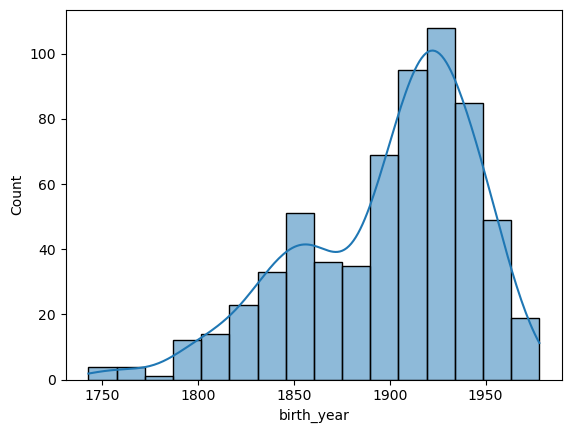

In [61]:
#plot birth year distribution
sns.histplot(hof['birth_year'], kde=True)
plt.show()


In [63]:
import zipfile as zip
import os
import csv


In [67]:
hof_patents = hof[hof['patent'] != 'missing']['patent'].apply(eval).explode().dropna().to_list()

In [70]:
len(hof_patents)

692

In [71]:
len(set(hof_patents))

589

In [72]:
hof_patents =list(set(hof_patents))
hof_patents = [x.replace(',', '') for x in hof_patents]

In [73]:
hof_patents

['157124',
 '53561',
 '221360',
 '1001260',
 '3249473',
 '646274',
 '4925572',
 '2032253',
 '3460378',
 '730176',
 '1835031',
 '3057356',
 '4469099',
 '4343993',
 '233692',
 '395782',
 '588',
 '2790362',
 '4115730',
 '1266766',
 '5514646',
 '1859624',
 '2201689',
 '1997493',
 '4405829',
 '2397657',
 '1760820',
 '355139',
 '610861',
 '615648',
 '5345599',
 '942699',
 '1462456',
 '6671821',
 '4063220',
 '2809194',
 '3858581',
 '3596202',
 '4459286',
 '2668661',
 '6051757',
 '4202340',
 '2721271',
 '2711534',
 '2356128',
 '4300182',
 '2912309',
 '6124851',
 '2694580',
 '3194237',
 '3432252',
 '1150523',
 '8064835',
 '4623597',
 '3104641',
 '2947610',
 '668111',
 '4750',
 '2064',
 '2708656',
 '3589363',
 '2455676',
 '5194299',
 '606635',
 '4591071',
 '1170965',
 '112254',
 '5625048',
 '44460',
 '3559190',
 '203411',
 '821393',
 '3149290',
 '3228831',
 '1005186',
 '2390636',
 '775134',
 '524042',
 '3158457',
 '78317',
 '2478967',
 '6276705',
 '582108',
 '2292387',
 '2443485',
 '321149',
 '2

In [84]:
os.chdir("/Volumes/Samsung_T5/patentsview")
file_name = "g_patent.tsv.zip"
f_name = "g_patent.tsv"
# Selecting the zip file.
with zip.ZipFile(file_name) as zf:
    patent = pd.read_csv(zf.open(f_name), delimiter="\t", quoting=csv.QUOTE_NONNUMERIC)

/var/folders/82/mcr3vdtj7kg2_7lr7tq4vk6m0000gn/T/ipykernel_5445/3075072471.py:6: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  patent = pd.read_csv(zf.open(f_name), delimiter="\t", quoting=csv.QUOTE_NONNUMERIC)


In [90]:
patent['patent_id'] = patent['patent_id'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) and x.is_integer() else str(x))

In [97]:
hofpat = patent[patent['patent_id'].isin(hof_patents)]

In [98]:
hofpat.to_csv('hofpat.csv', index=False)

In [99]:
hofpat

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
264864,10266850,utility,2019-04-23,Methods and compositions for RNA-directed targ...,The present disclosure provides a DNA-targetin...,B2,71.0,0.0,ipg190423.xml
1850527,3939151,utility,1976-02-17,Displacement of the thiazolidine ring in penic...,"This invention relates to a new, biologically...",A,1.0,0.0,pftaps19760217_wk07.zip
1861705,3950333,utility,1976-04-13,Pharmacologically active guanidine compounds,"The compounds are substituted thioalkyl-, ami...",A,22.0,0.0,pftaps19760413_wk15.zip
1864343,3952971,utility,1976-04-27,Airfoil shape for flight at subsonic speeds,An airfoil having an upper surface shaped to ...,A,20.0,0.0,pftaps19760427_wk17.zip
1864937,3953566,utility,1976-04-27,Process for producing porous products,This invention provides a tetrafluoroethylene...,A,24.0,0.0,pftaps19760427_wk17.zip
...,...,...,...,...,...,...,...,...,...
6445097,8555353,utility,2013-10-08,Methods and apparatuses for controlling access...,Methods and apparatuses for controlling access...,B2,25.0,0.0,ipg131008.xml
6539083,8649899,utility,2014-02-11,System and method for maneuvering a mobile dri...,A method of rotating an inventory holder inclu...,B2,65.0,0.0,ipg140211.xml
7760661,9879269,utility,2018-01-30,Method for modulating resistance,The present invention relates to the use of on...,B2,16.0,0.0,ipg180130.xml
7832209,9951342,utility,2018-04-24,Cultures with improved phage resistance,The present invention provides methods and com...,B2,25.0,0.0,ipg180424.xml


In [100]:
hof_unmatched = [x for x in hof_patents if x not in hofpat['patent_id'].to_list()]

In [102]:
hofpat

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
264864,10266850,utility,2019-04-23,Methods and compositions for RNA-directed targ...,The present disclosure provides a DNA-targetin...,B2,71.0,0.0,ipg190423.xml
1850527,3939151,utility,1976-02-17,Displacement of the thiazolidine ring in penic...,"This invention relates to a new, biologically...",A,1.0,0.0,pftaps19760217_wk07.zip
1861705,3950333,utility,1976-04-13,Pharmacologically active guanidine compounds,"The compounds are substituted thioalkyl-, ami...",A,22.0,0.0,pftaps19760413_wk15.zip
1864343,3952971,utility,1976-04-27,Airfoil shape for flight at subsonic speeds,An airfoil having an upper surface shaped to ...,A,20.0,0.0,pftaps19760427_wk17.zip
1864937,3953566,utility,1976-04-27,Process for producing porous products,This invention provides a tetrafluoroethylene...,A,24.0,0.0,pftaps19760427_wk17.zip
...,...,...,...,...,...,...,...,...,...
6445097,8555353,utility,2013-10-08,Methods and apparatuses for controlling access...,Methods and apparatuses for controlling access...,B2,25.0,0.0,ipg131008.xml
6539083,8649899,utility,2014-02-11,System and method for maneuvering a mobile dri...,A method of rotating an inventory holder inclu...,B2,65.0,0.0,ipg140211.xml
7760661,9879269,utility,2018-01-30,Method for modulating resistance,The present invention relates to the use of on...,B2,16.0,0.0,ipg180130.xml
7832209,9951342,utility,2018-04-24,Cultures with improved phage resistance,The present invention provides methods and com...,B2,25.0,0.0,ipg180424.xml
